In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2

# no warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# import data
df = pd.read_csv('cleaned_data_casual_list.csv')
df.head()

,folder_path,price,tirage,country,currency,amount,year,coin_name
0,Allemagne-1-Cent-2022-A-3348000-16493877409827...,1.74,4.597929e+07,Allemagne,Cent,1,2022,Allemagne-1-Cent-2022
1,Allemagne-2-Cent-2022-A-3348050-16493877464115...,2.51,4.220000e+07,Allemagne,Cent,2,2022,Allemagne-2-Cent-2022
2,Allemagne-5-Cent-2022-A-3348100-16493877526415...,2.27,2.700000e+07,Allemagne,Cent,5,2022,Allemagne-5-Cent-2022
3,Allemagne-10-Cent-2022-A-3348150-1649387757505...,2.61,1.980000e+07,Allemagne,Cent,10,2022,Allemagne-10-Cent-2022
4,Allemagne-20-Cent-2022-A-3348200-1649387761767...,2.24,2.620000e+07,Allemagne,Cent,20,2022,Allemagne-20-Cent-2022


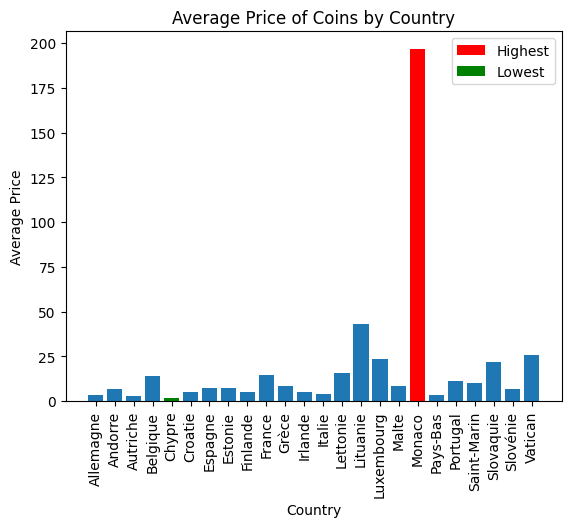

In [9]:
mean_prices = df.groupby('country')['price'].mean()

# Find the highest and lowest average prices
highest_price = mean_prices.max()
lowest_price = mean_prices.min()

# Get the indices of the highest and lowest values
highest_index = mean_prices.idxmax()
lowest_index = mean_prices.idxmin()

# Plot the bar chart with highlighted highest and lowest values
plt.bar(mean_prices.index, mean_prices)
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.title('Average Price of Coins by Country')
plt.xticks(rotation=90)

# Highlight the highest and lowest bars
plt.bar(highest_index, highest_price, color='red', label='Highest')
plt.bar(lowest_index, lowest_price, color='green', label='Lowest')

plt.legend()
plt.show()


In [10]:
# display the most expensive coin for each country
top_3 = df.groupby('country').apply(lambda x: x.nlargest(3, 'price')).reset_index(drop=True)
# display for 10 most expensive coins
top_10 = top_3.groupby('country').head(10).reset_index(drop=True)
top_10

,folder_path,price,tirage,country,currency,amount,year,coin_name
0,Allemagne-2-Euro-2023-A-3390450-16826502155675...,19.68,1.100000e+07,Allemagne,Euro,2,2023,Allemagne-2-Euro-2023
1,Allemagne-2-Euro-2022-A-3348350-16493877782806...,16.19,4.597929e+07,Allemagne,Euro,2,2022,Allemagne-2-Euro-2022
2,Allemagne-2-Euro-2006-A-4500-145787241062792.jpg,13.85,9.000000e+04,Allemagne,Euro,2,2006,Allemagne-2-Euro-2006
3,Andorre-2-Euro-2016-3141550-150537845823247.jpg,29.06,3.500000e+04,Andorre,Euro,2,2016,Andorre-2-Euro-2016
4,Andorre-1-Euro-2019-3250000-157568996679098.jpg,25.83,1.500000e+04,Andorre,Euro,1,2019,Andorre-1-Euro-2019
...,...,...,...,...,...,...,...,...
67,Slovenie-2-Euro-2019-3248050-157569037521490.jpg,32.48,8.000000e+03,Slovénie,Euro,2,2019,Slovenie-2-Euro-2019
68,Slovenie-2-Euro-2021-3331800-163678675715612.jpg,32.19,4.678665e+06,Slovénie,Euro,2,2021,Slovenie-2-Euro-2021
69,Vatican-2-Euro-2002-2800100-145431872117560.jpg,258.45,7.100000e+04,Vatican,Euro,2,2002,Vatican-2-Euro-2002
70,Vatican-2-Euro-commemorative-2005-Journee-mond...,244.00,8.500000e+04,Vatican,Euro,2,2005,Vatican-2-Euro-commemorative


In [11]:
# sort by price and display top 10
top_10 = df.nlargest(10, 'price')
# display country, coin name, and price
print(top_10[['country', 'price', 'year', 'coin_name']])

         country    price  year                      coin_name
3347      Monaco  4179.00  2007    Monaco-2-Euro-commemorative
3348      Monaco  3837.00  2015    Monaco-2-Euro-commemorative
3349    Lituanie  2076.00  2021         Lituanie-2-Euro-UNESCO
3350  Luxembourg  1483.00  2008        Luxembourg-Serie-2-Euro
2216      Monaco  1386.17  2006             Monaco-2-Cent-2006
3351      Monaco  1057.00  2016    Monaco-2-Euro-commemorative
3352    Belgique  1034.00  2014  Belgique-2-Euro-commemorative
3353      France   807.00  2008    France-2-Euro-commemorative
3354      Monaco   798.00  2021              Monaco-2-Euro-10e
3355      Monaco   787.00  2017    Monaco-2-Euro-commemorative


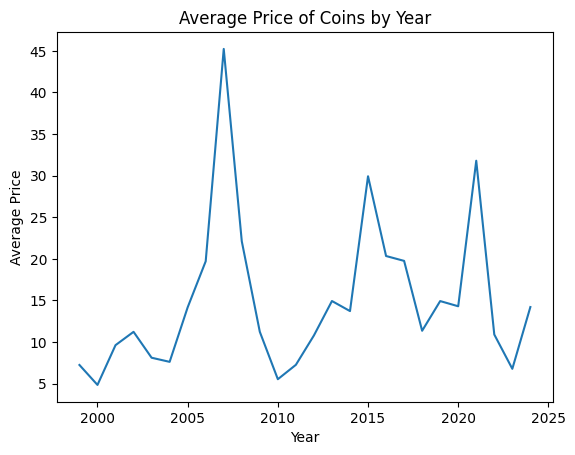

In [12]:
mean_prices_yearly = df.groupby('year')['price'].mean()

plt.plot(mean_prices_yearly.index, mean_prices_yearly)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Coins by Year')
plt.show()


In [13]:
def translate_country(country):
    dict_country = {
        'Allemagne': 'Germany',
        'Croatie': 'Croatia',
        'Autriche': 'Austria',
        'Vatican': 'Vatican City',
        'Belgique': 'Belgium',
        'Espagne': 'Spain',
        'Finlande': 'Finland',
        'France': 'France',
        'Grèce': 'Greece',
        'Irlande': 'Ireland',
        'Italie': 'Italy',
        'Luxembourg': 'Luxembourg',
        'Pays-Bas': 'Netherlands',
        'Portugal': 'Portugal',
        'Slovaquie': 'Slovakia',
        'Slovénie': 'Slovenia',
        'Vatican': 'Vatican',
        'Chypre': 'Cyprus',
        'Estonie': 'Estonia',
        'Lettonie': 'Latvia',
        'Lituanie': 'Lithuania',
        'Malte': 'Malta',
        'Monaco': 'Monaco',
        'Saint-Marin': 'San Marino',
        'Andorre': 'Andorra',
        'Belgique-Luxembourg': 'Belgium-Luxembourg',
        'Saint-Siège': 'Vatican',
    }
    mapping = dict_country.get(country.strip())
    return mapping


df['country'] = df['country'].apply(translate_country)


In [34]:
import plotly.express as px

# Calculate the highest value coins per country
mean_prices = df.groupby('country')['price'].mean().reset_index()

# Create a choropleth map with predefined country boundaries
fig = px.choropleth(
    mean_prices,
    locations='country',
    locationmode='country names',
    color='price',
    color_continuous_scale='Viridis',  # Change the color scale to Viridis
    title='Highest Value Coins by Country',
    scope='world',  # Use predefined world boundaries
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),  # Hide frame and coastlines
    coloraxis_colorbar=dict(title='Price')  # Set colorbar title
)

fig.show()


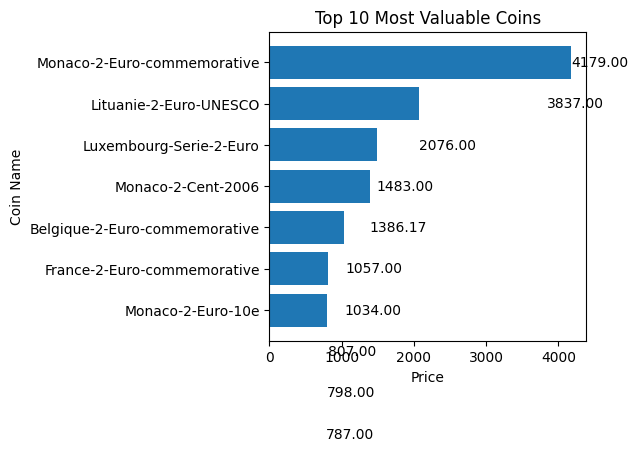

In [8]:
# Get the top 10 most valuable coins
top_10 = df.sort_values(by='price', ascending=False).head(10)

# Plot the horizontal bar chart
plt.barh(top_10['coin_name'], top_10['price'])

# Add the price laterally on each bar
for i, (coin, price) in enumerate(zip(top_10['coin_name'], top_10['price'])):
    plt.text(price + 1, i, f'{price:.2f}', va='center')

plt.xlabel('Price')
plt.ylabel('Coin Name')
plt.title('Top 10 Most Valuable Coins')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
### Finds the amount of the coins that are most likely to have high value

# Group coins by coin value and calculate the mean price
mean_price_by_coin_value = df.groupby('amount')['price'].mean().reset_index()

# Sort the mean prices in descending order to identify coins with high value
mean_price_by_coin_value.sort_values('price', ascending=False, inplace=True)

# Print the coins with the highest mean prices
top_high_value_coins = mean_price_by_coin_value.head(5)  # Adjust the number as per your requirement
print("Coins with the highest mean prices:")
top_high_value_coins


Coins with the highest mean prices:


,amount,price
1,2,45.296981
0,1,6.801940
3,10,5.998029
5,50,4.987947
2,5,4.081831


## Meta Analysis of Coins
### 1. Research Questions
 * Descriptive statistics of the coins. **DONE**
 * Is the number of coins are proportional between countries? **DONE**
 * Is the number of tirage correlated with the price? **DONE**
 * Is the year of tirage correlated with the price? **DONE**
 * Average price of the coins per year per country. **DONE**
 * Create bins of coins price in order to see how many coins are in each bin. **DONE**
 * Investigate to find if the coins names are containing information about their rarity. **DONE**
 * Outliers in the data. **DONE**


### 2. Process heterogeity analysis on the data 
 * Q-Stastistics / P-Value **DONE** 


In [10]:
df.describe()

,price,tirage,amount,year
count,3395.000000,3.395000e+03,3395.000000,3395.000000
mean,15.899991,3.674239e+07,11.174374,2012.793814
std,122.152002,9.443171e+07,15.685634,6.493814
min,0.370000,2.000000e+00,1.000000,1999.000000
25%,1.235000,7.000000e+04,2.000000,2008.000000
50%,2.880000,3.250000e+06,2.000000,2013.000000
75%,6.495000,2.904450e+07,10.000000,2018.000000
max,4179.000000,1.411686e+09,50.000000,2024.000000


In [11]:
### Finds outliers

# Calculate the z-scores of each value in the dataset

df['z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()
# find outliers based on z-score

outliers= df[df['z_score'].abs() > 3]
outliers

,folder_path,price,tirage,country,currency,amount,year,coin_name,z_score
2216,Monaco-2-Cent-2006-BE-80360-160395080856762.jpg,1386.17,80.0,Monaco,Cent,2,2006,Monaco-2-Cent-2006,11.217745
2217,Monaco-1-Cent-2005-BE-80330-160395079152804.jpg,397.24,300.0,Monaco,Cent,1,2005,Monaco-1-Cent-2005,3.121848
3347,Monaco-2-Euro-commemorative-2007-25e-anniversa...,4179.00,20001.0,Monaco,Euro,2,2007,Monaco-2-Euro-commemorative,34.081308
3348,Monaco-2-Euro-commemorative-2015-800e-annivers...,3837.00,10000.0,Monaco,Euro,2,2015,Monaco-2-Euro-commemorative,31.281518
3349,Lituanie-2-Euro-UNESCO-Reserve-biospherique-de...,2076.00,500.0,Lithuania,Euro,2,2021,Lituanie-2-Euro-UNESCO,16.865053
3350,Luxembourg-Serie-2-Euro-commemoratives-2008-Se...,1483.00,2500.0,Luxembourg,Euro,2,2008,Luxembourg-Serie-2-Euro,12.010446
3351,Monaco-2-Euro-commemorative-2016-150e-annivers...,1057.00,15000.0,Monaco,Euro,2,2016,Monaco-2-Euro-commemorative,8.522988
3352,Belgique-2-Euro-commemorative-150e-anniversair...,1034.00,2.0,Belgium,Euro,2,2014,Belgique-2-Euro-commemorative,8.334698
3353,France-2-Euro-commemorative-2008-Presidence-fr...,807.00,5000.0,France,Euro,2,2008,France-2-Euro-commemorative,6.476357
3354,Monaco-2-Euro-10e-anniversaire-de-mariage-du-P...,798.00,15000.0,Monaco,Euro,2,2021,Monaco-2-Euro-10e,6.402679


In [12]:
# Remove temporary outliers that are stocked in outliers variable

df_nooutliers = df[df['z_score'].abs() <= 3]

In [13]:
# use cross tabulation to find the number of coins per country

# Count the number of coins per country
countries = pd.crosstab(index=df_nooutliers['country'], columns='coins')

# add average price of coins per country
avg_price = pd.crosstab(index=df_nooutliers['country'], columns='avg_price', values=df_nooutliers['price'], aggfunc='mean')

# Concatenate the two dataframes horizontally
avg_countries = pd.concat([countries, avg_price], axis=1)

# Display the result
avg_countries = avg_countries.sort_values(by='avg_price', ascending=False)
avg_countries

### Clearly its missing coins in San marino, Croatia, Nertherlands
### We can see that the avg price of the coins does not depends on the number of coins per country
### Monaco, Lithuania, and Vatican have the highest avg price of coins


col_0,coins,avg_price
country,,
Monaco,83,36.733373
Vatican,180,25.620667
Latvia,64,15.804375
Lithuania,63,10.911111
San Marino,176,10.176136
Belgium,193,8.824145
Greece,171,8.699532
Malta,107,8.450467
Luxembourg,183,8.357978


         tirage    price
tirage  1.00000 -0.04443
price  -0.04443  1.00000


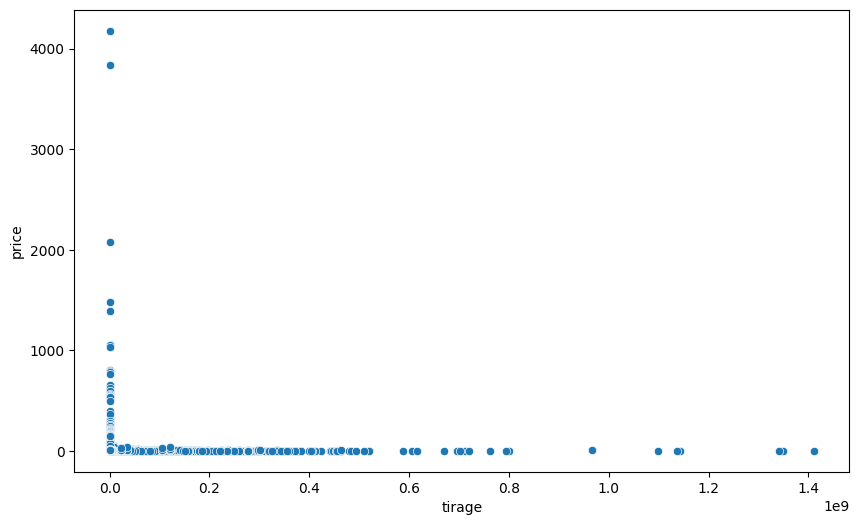

In [10]:
# Correlation between Number of tirage and price

corr_tirage_price = df[['tirage', 'price']].corr()
# display the correlation
print(corr_tirage_price)
# display the scatter plot less bigger
plt.figure(figsize=(10, 6))
sca = sns.scatterplot(x='tirage', y='price', data=df)

### Very weak negative correlation between tirage and price. it suggests that the more tirage the less price, but the magnitude is quite small.

In [11]:
# Year correlation with the price

year_price = df[['year', 'price']].corr()
year_price

### Insignificant correlation between year and price.

,year,price
year,1.000000,0.010654
price,0.010654,1.000000


In [12]:
df

,folder_path,price,tirage,country,currency,amount,year,coin_name
0,Allemagne-1-Cent-2022-A-3348000-16493877409827...,1.74,4.597929e+07,Germany,Cent,1,2022,Allemagne-1-Cent-2022
1,Allemagne-2-Cent-2022-A-3348050-16493877464115...,2.51,4.220000e+07,Germany,Cent,2,2022,Allemagne-2-Cent-2022
2,Allemagne-5-Cent-2022-A-3348100-16493877526415...,2.27,2.700000e+07,Germany,Cent,5,2022,Allemagne-5-Cent-2022
3,Allemagne-10-Cent-2022-A-3348150-1649387757505...,2.61,1.980000e+07,Germany,Cent,10,2022,Allemagne-10-Cent-2022
4,Allemagne-20-Cent-2022-A-3348200-1649387761767...,2.24,2.620000e+07,Germany,Cent,20,2022,Allemagne-20-Cent-2022
...,...,...,...,...,...,...,...,...
3390,Luxembourg-2-Euro-100e-anniversaire-de-la-nais...,159.00,2.500000e+03,Luxembourg,Euro,2,2021,Luxembourg-2-Euro-100e
3391,Luxembourg-2-Euro-40e-anniversaire-du-mariage-...,157.00,2.500000e+03,Luxembourg,Euro,2,2021,Luxembourg-2-Euro-40e
3392,Finlande-2-Euro-commemorative-2017-Nature-finl...,154.00,1.100000e+04,Finland,Euro,2,2017,Finlande-2-Euro-commemorative
3393,Vatican-2-Euro-commemorative-2007-80e-annivers...,151.00,8.500000e+04,Vatican,Euro,2,2007,Vatican-2-Euro-commemorative


In [20]:
# find all re coins that price is above 20
above_20_coins = df[df['price'] > 20]
print(above_20_coins[['coin_name', 'price', 'amount']].value_counts())

# Analyse the distribution of the amount of coins to see which ones get higher price
amount_counts = above_20_coins['amount'].value_counts()
print(amount_counts)


coin_name                      price    amount
Vatican-50-Cent-2005           21.85    50        1
Andorre-1-Cent-2014            25.22    1         1
Andorre-1-Euro-2019            25.83    1         1
Andorre-1-Euro-2020            25.45    1         1
Andorre-2-Euro-2016            29.06    2         1
                                                 ..
Belgique-2-Euro-2021           26.31    2         1
Belgique-2-Euro-2022           29.83    2         1
Belgique-2-Euro-commemorative  256.00   2         1
                               1034.00  2         1
Belgique-20-Cent-1999          40.15    20        1
Name: count, Length: 307, dtype: int64
amount
2     199
1      50
10     17
5      15
20     13
50     13
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Coins per Price Range')

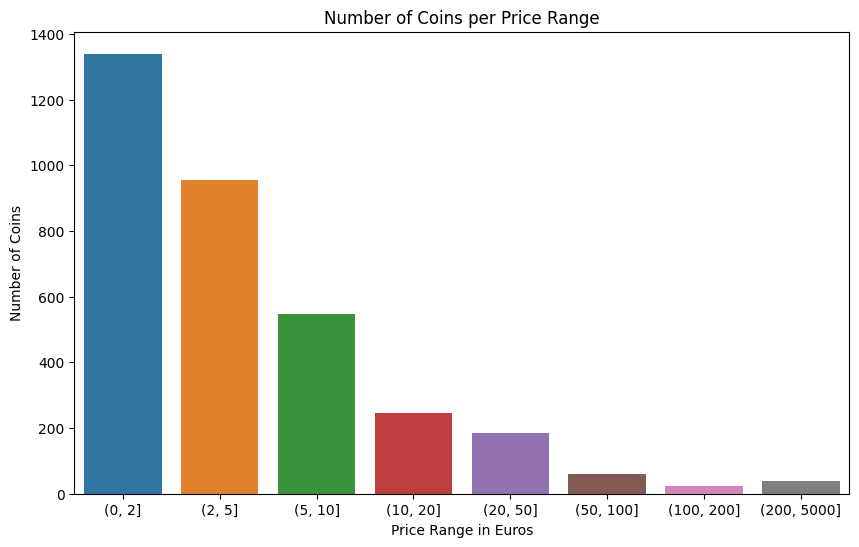

In [17]:
# create bins for the range of prices 
bins = [0, 2, 5, 10, 20, 50, 100, 200, 5000]
df['price_range'] = pd.cut(df['price'], bins)
counts = df['price_range'].value_counts()
# display in nice datavisualization
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Price Range in Euros')
plt.ylabel('Number of Coins')
plt.title('Number of Coins per Price Range')

### Clearly the majority of the coins are between 0 and 10 euros.

In [45]:
### Make a column that says if the coin is commemorative or not

# find is in there folder_path there is the words 'commemorative' or 'commemoratives' or 'anniverary' or 'anniversaries'
df['commemorative'] = df['folder_path'].str.contains('commemorative|Commemoratives|anniversaire|anniversaires', case=False)
# count the number of commemorative coins that are true
df_commemorative = df[df['commemorative'] == True]

Text(0.5, 1.0, 'Average Price of Coins by Year and Country')

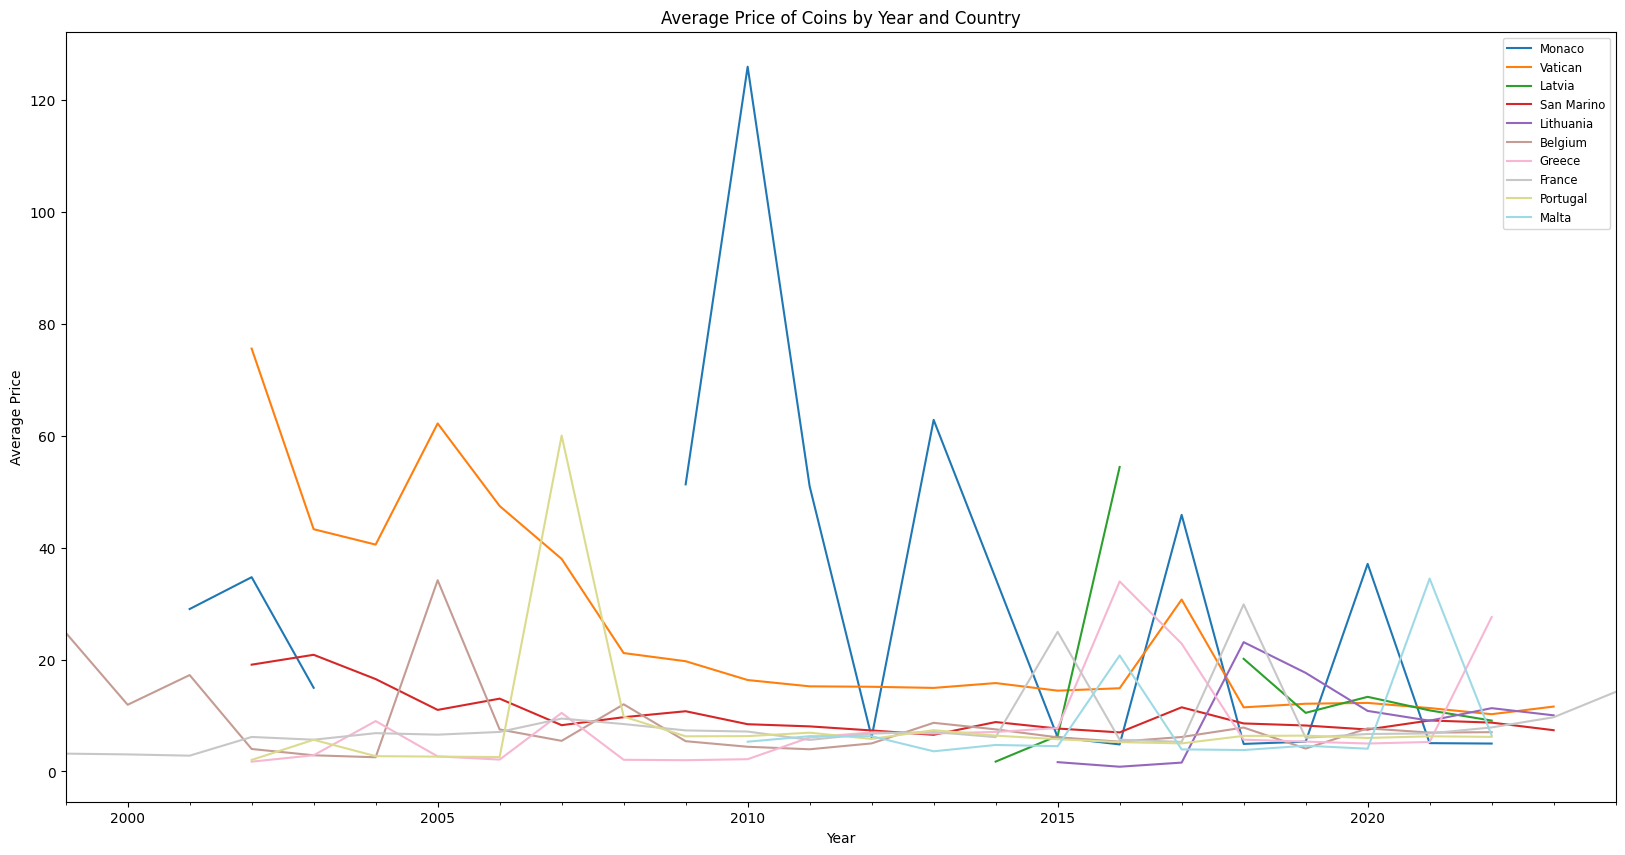

In [46]:
# Convert the 'Year' column to datetime format
df_nooutliers['year'] = pd.to_datetime(df_nooutliers['year'], format='%Y')

# Group the data by year and country, and calculate the mean price
grouped = df_nooutliers.groupby(['year', 'country'])['price'].mean()

# Get a list of unique countries
countries = df_nooutliers['country'].unique()

# Get the top 5 countries with the highest average price
top_countries = grouped.groupby('country').mean().nlargest(10).index.tolist()

# Generate a list of colors
colors = plt.cm.tab20(np.linspace(0, 1, len(top_countries)))

# Plot the data for the top countries
ax = grouped.unstack()[top_countries].plot(figsize=(20, 10), color=colors)
ax.legend(fontsize='small')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.set_title('Average Price of Coins by Year and Country')

### We can see than prices are mostly decreasing over the years. 
### In 2016 there was an important spike in prices over all the countries.
### The behaviour of the prices are quite similar for all the countries. There is a big spike in price and the year just after the price goes down.
### An interesting observation is that the prices of coins in Vatican do not experience significant declines compared to other countries.

### Process heterogeity analysis on the data 
 * Q-Stastistics 
 * l 2 statistics
 

In [47]:
# remove price_group, tirage_group, and z_score columns
df_nooutliers

,folder_path,price,tirage,country,currency,amount,year,coin_name,z_score
0,Allemagne-1-Cent-2022-A-3348000-16493877409827...,1.74,4.597929e+07,Germany,Cent,1,2022-01-01,Allemagne-1-Cent-2022,-0.115921
1,Allemagne-2-Cent-2022-A-3348050-16493877464115...,2.51,4.220000e+07,Germany,Cent,2,2022-01-01,Allemagne-2-Cent-2022,-0.109617
2,Allemagne-5-Cent-2022-A-3348100-16493877526415...,2.27,2.700000e+07,Germany,Cent,5,2022-01-01,Allemagne-5-Cent-2022,-0.111582
3,Allemagne-10-Cent-2022-A-3348150-1649387757505...,2.61,1.980000e+07,Germany,Cent,10,2022-01-01,Allemagne-10-Cent-2022,-0.108799
4,Allemagne-20-Cent-2022-A-3348200-1649387761767...,2.24,2.620000e+07,Germany,Cent,20,2022-01-01,Allemagne-20-Cent-2022,-0.111828
...,...,...,...,...,...,...,...,...,...
3390,Luxembourg-2-Euro-100e-anniversaire-de-la-nais...,159.00,2.500000e+03,Luxembourg,Euro,2,2021-01-01,Luxembourg-2-Euro-100e,1.171491
3391,Luxembourg-2-Euro-40e-anniversaire-du-mariage-...,157.00,2.500000e+03,Luxembourg,Euro,2,2021-01-01,Luxembourg-2-Euro-40e,1.155118
3392,Finlande-2-Euro-commemorative-2017-Nature-finl...,154.00,1.100000e+04,Finland,Euro,2,2017-01-01,Finlande-2-Euro-commemorative,1.130559
3393,Vatican-2-Euro-commemorative-2007-80e-annivers...,151.00,8.500000e+04,Vatican,Euro,2,2007-01-01,Vatican-2-Euro-commemorative,1.105999


In [16]:
# Define a function to calculate the Q statistic
def calculate_Q_statistic(observed, expected):
    """
    Calculate the Q statistic for a contingency table.
    
    Parameters:
    observed (array-like): The observed frequencies.
    expected (array-like): The expected frequencies.
    
    Returns:
    float: The Q statistic.
    """
    Q = np.sum((observed - expected)**2 / expected)
    return Q

# Define a contingency table using your data
observed = np.histogram2d(df_nooutliers['price'], df_nooutliers['tirage'], bins=2)[0]
total = np.sum(observed)
row_totals = np.sum(observed, axis=1)
col_totals = np.sum(observed, axis=0)
expected = np.outer(row_totals, col_totals) / total

# Calculate the Q statistic
Q = calculate_Q_statistic(observed, expected)

# Calculate the degrees of freedom
df_nooutliers = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Calculate the p-value
p_value = 1 - chi2.cdf(Q, df_nooutliers)

# Print the results
print('Q statistic:', Q)
print('Degrees of freedom:', df_nooutliers)
print('p-value:', p_value)

### Based on the results there is no significant evidence of an association between the variables.

NameError: name 'df_nooutliers' is not defined

In [17]:
df.head()

,folder_path,price,tirage,country,currency,amount,year,coin_name
0,Allemagne-1-Cent-2022-A-3348000-16493877409827...,1.74,4.597929e+07,Germany,Cent,1,2022,Allemagne-1-Cent-2022
1,Allemagne-2-Cent-2022-A-3348050-16493877464115...,2.51,4.220000e+07,Germany,Cent,2,2022,Allemagne-2-Cent-2022
2,Allemagne-5-Cent-2022-A-3348100-16493877526415...,2.27,2.700000e+07,Germany,Cent,5,2022,Allemagne-5-Cent-2022
3,Allemagne-10-Cent-2022-A-3348150-1649387757505...,2.61,1.980000e+07,Germany,Cent,10,2022,Allemagne-10-Cent-2022
4,Allemagne-20-Cent-2022-A-3348200-1649387761767...,2.24,2.620000e+07,Germany,Cent,20,2022,Allemagne-20-Cent-2022


In [18]:
# remove commemorative column, z_score, price_range
df = df.drop([ 'z_score', 'price_range'], axis=1)
# rename folder_path to picture_path
df = df.rename(columns={'folder_path': 'picture_path'})
df.head()

KeyError: "['z_score', 'price_range'] not found in axis"

In [19]:
# save the dataframe to a csv file
df.to_csv('coins_to_db.csv', index=False)

In [53]:
# count how many lines 
df.shape

(3395, 9)

Selection in datataset of the most valuable coins above 20 euros

In [21]:
def clean_dataframe(df):
    """
    Cleans the dataframe by dropping the 'commemorative', 'z_score', and 'price_range' columns,
    and renaming the 'folder_path' column to 'picture_path'.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to clean.
    
    Returns:
    pandas.DataFrame: The cleaned dataframe.
    """
    df = df.drop(['currency', 'z_score', 'price_range'], axis=1)
    df = df.rename(columns={'folder_path': 'picture_path'})
    return df

above_20_coins['commemorative'] = above_20_coins['folder_path'].str.contains('commemorative|Commemoratives|anniversaire|anniversaires', case=False)

In [22]:
above_20_coins = clean_dataframe(above_20_coins)

KeyError: "['z_score', 'price_range'] not found in axis"

In [23]:


## TO REMOVE 
different_to_remove = ["Croatie-Serie-Euro-Dubrovnik-2023-3388650-167870704483484.jpg",
"Belgique-2-Euro-commemorative-150e-anniversaire-de-la-creation-de-la-Croix-Rouge-de-Belgique-2014-sous-blister-Tranche-italienne-3023850-148161253514338.jpg",
"France-2-Euro-commemorative-2008-Presidence-francaise-du-Conseil-de-l-UE-Blister-colorisee-19545-159195835856839.jpg",
"Luxembourg-2-Euro-Commemoratives-Serie-2019-2021-BE-3333250-163800376477391.jpg",
"Slovaquie-10-Euro-Argent-100e-anniversaire-de-la-naissance-de-Alexander-Dubcek-2021-BE-Set-3330210-163860595342167.jpg",
"Luxembourg-2-Euro-Commemoratives-Serie-2016-2018-BE-3189850-154687677858976.jpg",
"Luxembourg-Serie-2-Euro-commemoratives-2009-2012-Serie-de-la-banque-Centrale-BE-3015350-154695318376381.jpg",
"Espagne-2-Euro-commemorative-2015-La-grotte-dAltamira-Blister-BE-3028340-145703091566105.jpg",
"Luxembourg-Serie-2-Euro-commemoratives-2013-2015-Serie-de-la-banque-Centrale-BE-3042100-154695310196495.jpg",
"Grece-2-Euro-commemorative-2016-150e-anniversaire-de-l-incendie-du-Monastere-d-Arkadi-BE-dans-coffret-original-3125100-151413260957892.jpg",
"Espagne-2-Euro-commemorative-2013-Monastere-de-San-Lorenzo-de-El-Escorial-Blister-BE-3020770-145703015611334.jpg",
"Estonie-2-Euro-commemorative-Centenaire-de-la-naissance-de-Paul-Keres-2016-Coincard-3024890-146364398990339.jpg",
"Espagne-2-Euro-commemorative-2012-Cathedrale-de-Burgos-Blister-BE-3017590-145572998924694.jpg",
"Grece-2-Euro-commemorative-2017-Site-archeologique-de-Philippes-Coffret-BE-3159150-151403739391066.jpg",
"Finlande-2-Euro-commemorative-2017-Nature-finlandaise-Coffret-BE-3154450-151403696084214.jpg",
"Espagne-2-Euro-commemorative-2014-Parc-Gueell-Torremolinos-Coincard-BE-3028275-159279949856016.jpg"]

# TO MODIFY
# CHANGE PRICE TO 20 EUROS Slovaquie-2-Euro-100e-anniversaire-de-la-naissance-de-Alexander-Dubcek-2021-BE-3329960-163860582561569.jpg
# CHANGE PRICE TO 78 EUROS Malte-2-Euro-Covid-19-Heros-pandemiques-2021-coffret-3311555-162772452782737.png	




In [24]:
# delete rows according to the folder_path name 

def delete_rows_by_column_value(df, column_name, values_to_delete):
        """
        Deletes rows from a dataframe where the value in a specified column is in a given list of strings.
        
        Parameters:
        df (pandas.DataFrame): The dataframe to modify.
        column_name (str): The name of the column to check.
        values_to_delete (list): A list of strings. Rows where the value in the specified column is in this list will be deleted.
        
        Returns:
        pandas.DataFrame: The modified dataframe.
        """
        return df[~df[column_name].isin(values_to_delete)]

In [26]:
above_20_coins = delete_rows_by_column_value(above_20_coins, 'folder_path',different_to_remove )

In [28]:
above_20_coins.to_csv('above_20_coins.csv', index=False)


In [33]:
above_20_coins

,folder_path,price,tirage,country,currency,amount,year,coin_name,commemorative
176,Andorre-1-Euro-2020-3291750-160940548933833.jpg,25.45,12000.0,Andorra,Euro,1,2020,Andorre-1-Euro-2020,False
184,Andorre-1-Euro-2019-3250000-157568996679098.jpg,25.83,15000.0,Andorra,Euro,1,2019,Andorre-1-Euro-2019,False
209,Andorre-2-Euro-2016-3141550-150537845823247.jpg,29.06,35000.0,Andorra,Euro,2,2016,Andorre-2-Euro-2016,False
218,Andorre-1-Cent-2014-3028970-146428257035657.jpg,25.22,200000.0,Andorra,Cent,1,2014,Andorre-1-Cent-2014,False
286,Autriche-1-Euro-2015-3022890-155496795756469.jpg,23.72,50000.0,Austria,Euro,1,2015,Autriche-1-Euro-2015,False
...,...,...,...,...,...,...,...,...,...
3387,Vatican-2-Euro-commemorative-2017-Centenaire-d...,166.00,10000.0,Vatican,Euro,2,2017,Vatican-2-Euro-commemorative,True
3388,Malte-2-Euro-Commemoratives-Serie-2016-2020-De...,165.00,500.0,Malta,Euro,2,2016,Malte-2-Euro-Commemoratives,True
3390,Luxembourg-2-Euro-100e-anniversaire-de-la-nais...,159.00,2500.0,Luxembourg,Euro,2,2021,Luxembourg-2-Euro-100e,True
3391,Luxembourg-2-Euro-40e-anniversaire-du-mariage-...,157.00,2500.0,Luxembourg,Euro,2,2021,Luxembourg-2-Euro-40e,True
